# **Amazon Dataset**

# About the Data

* This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon.
* The dataset contains 1,465 entries with 16 columns, covering details about various products, including product information, pricing, ratings, reviews, and links to images and product pages. Several columns contain numerical data stored as text (e.g., prices and ratings), which will require conversion for analysis.

# Step 1: Data Loading

### 1.Import libraries

In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from sqlalchemy import create_engine
import mysql.connector

### 2.Load data

In [ ]:
amazon = pd.read_csv('amazon.csv')

In [ ]:
amazon.head(5)

In [ ]:
amazon.columns

In [ ]:
amazon.shape

In [578]:
print(f"rows: {amazon.shape[0]}, columns: {amazon.shape[1]}")

rows: 1465, columns: 16


In [579]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Step 2: Data cleaning and Transformation

### 1. Clean and Convert Data:
* Remove symbols from prices, convert them to numeric.*
* Clean up ratings, discount percentages, and other fields.*

In [580]:
amazon.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [581]:
amazon["user_id"] = amazon["user_id"].astype("string")		
amazon["user_name"] = amazon["user_name"].astype("string")		
amazon["review_title"] = amazon["review_title"].astype("string")		
amazon["review_content"] = amazon["review_content"].astype("string")		
amazon["img_link"] = amazon["img_link"].astype("string")		
amazon["product_link"] = amazon["product_link"].astype("string")	

In [582]:
amazon['discounted_price'] = pd.to_numeric(amazon['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
amazon['actual_price'] = pd.to_numeric(amazon['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'].str.replace(',', ''), errors='coerce')

In [583]:
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','').astype('float64')

In [584]:
amazon['discount_percentage'] = amazon['discount_percentage'] / 100

In [585]:
amazon['discount_percentage'].head(5)

0    0.64
1    0.43
2    0.90
3    0.53
4    0.61
Name: discount_percentage, dtype: float64

### 2. Handle Missing Values:

In [586]:
amazon.isnull().sum().sort_values(ascending = False)

rating_count           2
rating                 1
product_id             0
product_name           0
discounted_price       0
category               0
discount_percentage    0
actual_price           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

###### Different ways to output the rows with null values:

In [587]:
amazon[amazon["rating_count"].isnull()]   #1

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [588]:
amazon.loc[amazon['rating_count'].isna()]  #2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [589]:
amazon[amazon.isnull().any(axis=1)]     #3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [590]:
amazon['rating_count'] = amazon['rating_count'].fillna(amazon['rating_count'].mode()[0])

In [591]:
amazon[amazon["rating_count"].isnull() == True]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [592]:
amazon['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      4
4.8      3
5.0      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [593]:
amazon[amazon["rating"].isnull()] 

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [594]:
amazon['rating'] = amazon['rating'].fillna(amazon['rating'].mode()[0])

In [595]:
amazon.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### 3. Duplicates:

In [596]:
amazon.duplicated().sum()

np.int64(0)

### 4. Descriptive statistics 

In [597]:
amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096587,18283.367235
std,6944.304394,10874.826864,0.216359,0.291574,42725.921124
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


### 5. Splitting Categories

In [598]:
sorted(amazon['category'].unique())

['Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers',
 'Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
 'Computers&Accessories|Accessories&Peripheral

In [599]:
splitted = amazon['category'].str.split('|', expand=True)

In [600]:
splitted = splitted.rename(columns={0:'category1', 1:'category2', 2:'category3', 3:'category4', 4:'category5', 5:'category6', 6:'category7'})

In [601]:
splitted

,category1,category2,category3,category4,category5,category6,category7
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [602]:
splitted.drop(columns=['category3','category4','category5','category6','category7'], inplace=True)

In [603]:
splitted

,category1,category2
0,Computers&Accessories,Accessories&Peripherals
1,Computers&Accessories,Accessories&Peripherals
2,Computers&Accessories,Accessories&Peripherals
3,Computers&Accessories,Accessories&Peripherals
4,Computers&Accessories,Accessories&Peripherals
...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances
1461,Home&Kitchen,Kitchen&HomeAppliances
1462,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,Home&Kitchen,"Heating,Cooling&AirQuality"


In [604]:
amazon_clean = pd.concat([amazon, splitted], axis=1)

In [605]:
amazon_clean.drop(columns='category', inplace=True)

In [606]:
amazon_clean

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https

In [607]:
amazon_clean['category1'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [608]:
unique1 = pd.DataFrame(amazon_clean['category1'].unique(),columns = ['category1'])

In [609]:
unique1

,category1
0,Computers&Accessories
1,Electronics
2,MusicalInstruments
3,OfficeProducts
4,Home&Kitchen
5,HomeImprovement
6,Toys&Games
7,Car&Motorbike
8,Health&PersonalCare


In [610]:
unique2 = pd.DataFrame(amazon_clean['category2'].unique(),columns = ['category2'])

In [611]:
unique2

,category2
0,Accessories&Peripherals
1,NetworkingDevices
2,"HomeTheater,TV&Video"
3,HomeAudio
4,WearableTechnology
5,Mobiles&Accessories
6,Accessories
7,"Headphones,Earbuds&Accessories"
8,ExternalDevices&DataStorage
9,Microphones


In [612]:
amazon_clean['category1'].value_counts()

category1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [613]:
amazon_clean['category1'] = amazon_clean['category1'].str.replace('&', ' & ')

In [614]:
amazon_clean['category1'] = amazon_clean['category1'].str.replace('OfficeProducts', 'Office Products')
amazon_clean['category1'] = amazon_clean['category1'].str.replace('MusicalInstruments', 'Musical Instruments')
amazon_clean['category1'] = amazon_clean['category1'].str.replace('HomeImprovement', 'Home Improvement')

In [615]:
amazon_clean['category2'].value_counts()

category2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Monitors                                     2
Ele

In [616]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace('&', ' & ')

In [617]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace(',', ', ')

In [618]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeAppliances', 'Home Appliances')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('AirQuality', 'Air Quality')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('WearableTechnology', 'Wearable Technology')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('NetworkingDevices', 'Networking Devices')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('OfficePaperProducts', 'Office Paper Products')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('ExternalDevices', 'External Devices')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('DataStorage', 'Data Storage')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeStorage', 'Home Storage')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeAudio', 'Home Audio')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('BatteryChargers', 'Battery Chargers')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('CraftMaterials', 'Craft Materials')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('OfficeElectronics', 'Office Electronics')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('PowerAccessories', 'Power Accessories')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('CarAccessories', 'Car Accessories')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeTheater', 'Home Theater')			

In [619]:
amazon_clean['category2'].value_counts()

category2
Accessories & Peripherals                       381
Kitchen & Home Appliances                       308
Home Theater, TV & Video                        162
Mobiles & Accessories                           161
Heating, Cooling & Air Quality                  116
Wearable Technology                              76
Headphones, Earbuds & Accessories                66
Networking Devices                               34
Office Paper Products                            27
External Devices & Data Storage                  18
Cameras & Photography                            16
Home Storage & Organization                      16
Home Audio                                       16
General Purpose Batteries & Battery Chargers     14
Accessories                                      14
Printers, Inks & Accessories                     11
Craft Materials                                   7
Components                                        5
Office Electronics                                4
Mi

# Step 3: Exploratory Data Analysis (EDA)

In [620]:
# Summary statistics
amazon_clean[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096587,18283.367235
std,6944.304394,10874.826864,0.216359,0.291574,42725.921124
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


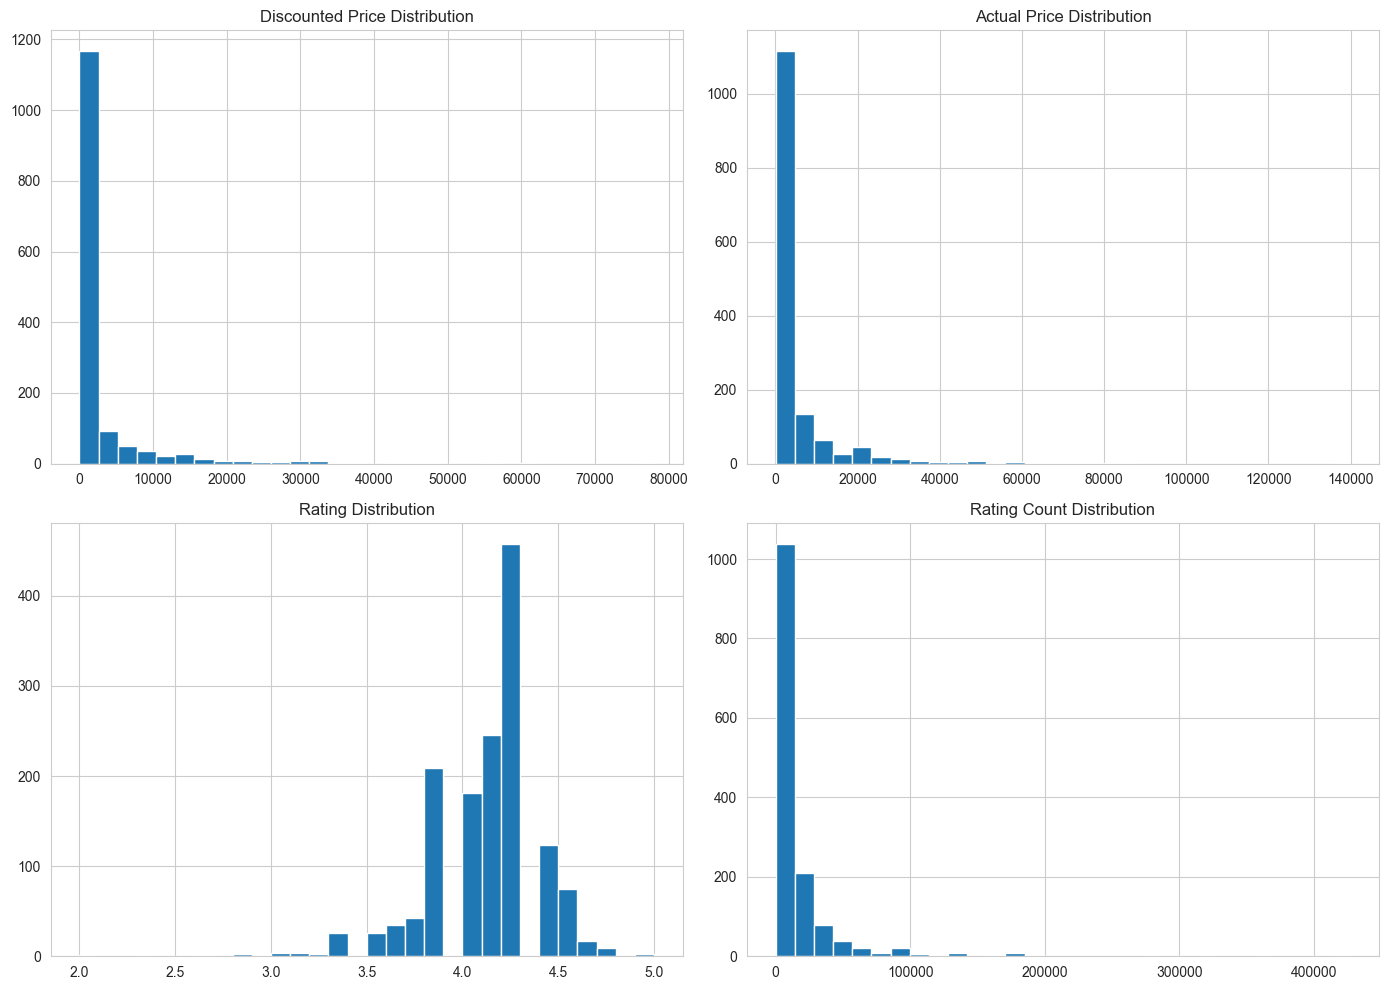

In [621]:
# Histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
amazon_clean['discounted_price'].hist(ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Discounted Price Distribution')
amazon_clean['actual_price'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Actual Price Distribution')
amazon_clean['rating'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Rating Distribution')
amazon_clean['rating_count'].hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Rating Count Distribution')
plt.tight_layout()
plt.show()

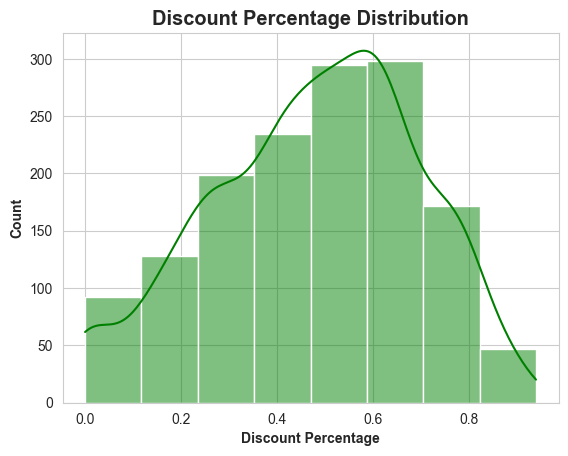

In [622]:
disc_hist = sns.histplot(data=amazon_clean, x='discount_percentage', bins=8, kde=True, color='green')
disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')
plt.show()

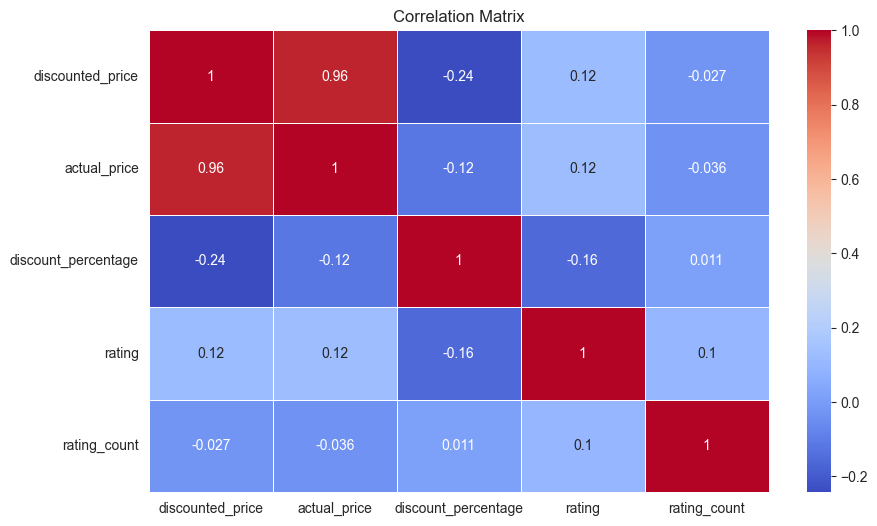

In [623]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = amazon_clean[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Product Performance Analysis

In [624]:
# Top-rated products
top_rated_products = amazon_clean.sort_values(by='rating', ascending=False).head(10)
top_rated_products[['product_name', 'rating', 'rating_count']]

,product_name,rating,rating_count
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0,23.0
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",5.0,9378.0
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0,5.0
1145,Swiffer Instant Electric Water Heater Faucet T...,4.8,53803.0
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",4.8,3964.0
1201,"Oratech Coffee Frother electric, milk frother ...",4.8,28.0
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",4.7,1729.0
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,4.7,5935.0
459,Spigen EZ Fit Tempered Glass Screen Protector ...,4.7,7779.0
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,4.7,2300.0


In [1]:
#Creating rating score for Rankings
rating_score = []			
for score in amazon_clean['rating']:			
    if score < 2.0 : rating_score.append('Poor')			
    elif score < 3.0 : rating_score.append('Below Average')			
    elif score < 4.0 : rating_score.append('Average')			
    elif score < 5.0 : rating_score.append('Above Average')			
    elif score == 5.0 : rating_score.append('Excellent')	

NameError: name 'amazon_clean' is not defined

In [ ]:
amazon_clean['rating_score'] = rating_score
amazon_clean['rating_score'] = amazon_clean['rating_score'].astype('category')
rating_score = amazon_clean["rating_score"].value_counts().reindex(index = ['Below Average', 'Average', 'Above Average', 'Excellent']). \
rename_axis('rating_score').reset_index(name='counts')
rating_score

In [ ]:
* So we that most products have been rated Above Average in the range of 4-5
Few products that are rated Below Average and Excellent. 
No products are rated as Poor. *

In [ ]:
# Top rated and poor rated products
five_star = amazon_clean.query("rating == 5")

In [ ]:
five_star.shape

In [ ]:
plt.barh(five_star['product_name'],five_star['actual_price'])

In [ ]:
poor_rating = amazon_clean.query("rating < 3").sort_values(by="actual_price")

In [ ]:
plt.barh(poor_rating['product_name'],poor_rating['actual_price'])

* Analysing products by Categories*

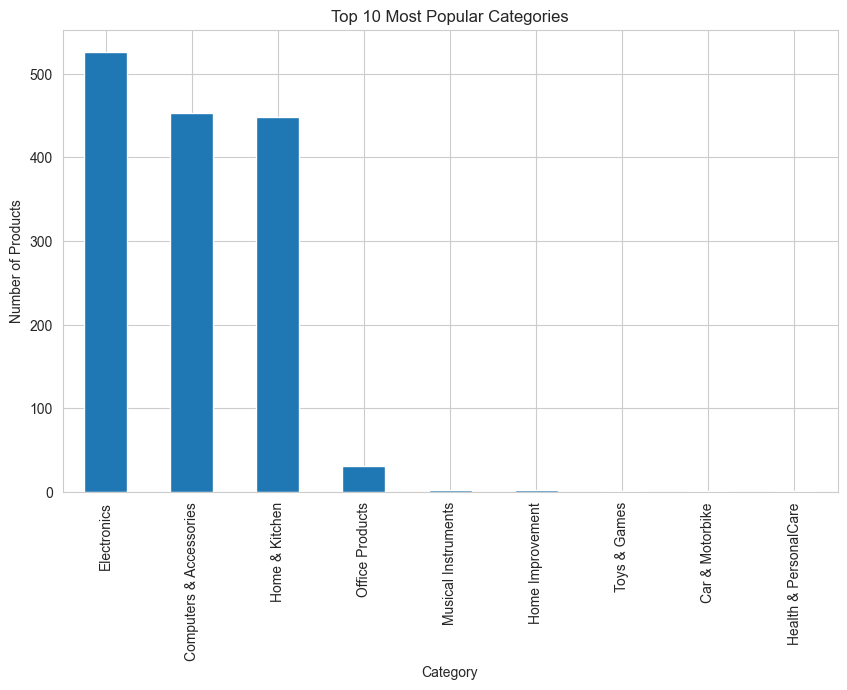

In [625]:
# Most popular categories based on product count
popular_categories = amazon_clean['category1'].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_categories.plot(kind='bar')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [627]:
# Number of products in each categories, subcategories
category_product = amazon_clean[['category1', 'category2', 'product_id']]
category_product = pd.pivot_table(category_product, index=['category1', 'category2'], aggfunc='count')
category_product

product_id
category1               category2                                               
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

In [632]:
# Average rating by categories
average_rating = amazon_clean.groupby("category1")["rating"].mean().reset_index()

In [633]:
average_rating

,category1,rating
0,Car & Motorbike,3.800000
1,Computers & Accessories,4.154967
2,Electronics,4.081749
3,Health & PersonalCare,4.000000
4,Home & Kitchen,4.040848
5,Home Improvement,4.250000
6,Musical Instruments,3.900000
7,Office Products,4.309677
8,Toys & Games,4.300000


In [640]:
top_products = amazon_clean.sort_values(['category1', 'rating_count'], ascending=[True, False])

In [641]:
average_rating = amazon_clean.groupby("category1")["rating"].mean().reset_index()

In [642]:
average_rating.sort_values(['rating'], ascending=[False])

,category1,rating
7,Office Products,4.309677
8,Toys & Games,4.300000
5,Home Improvement,4.250000
1,Computers & Accessories,4.154967
2,Electronics,4.081749
4,Home & Kitchen,4.040848
3,Health & PersonalCare,4.000000
6,Musical Instruments,3.900000
0,Car & Motorbike,3.800000


In [643]:
# Distribution of products by Category
by_category1 = amazon_clean['category1'].value_counts()[:30]

In [644]:
top_categories1 = pd.DataFrame({'Category1': by_category.index, 'Number of Products': by_category.values})			

In [645]:
top_categories1

,Category1,Number of Products
0,Electronics,526
1,Computers & Accessories,453
2,Home & Kitchen,448
3,Office Products,31
4,Musical Instruments,2
5,Home Improvement,2
6,Toys & Games,1
7,Car & Motorbike,1
8,Health & PersonalCare,1


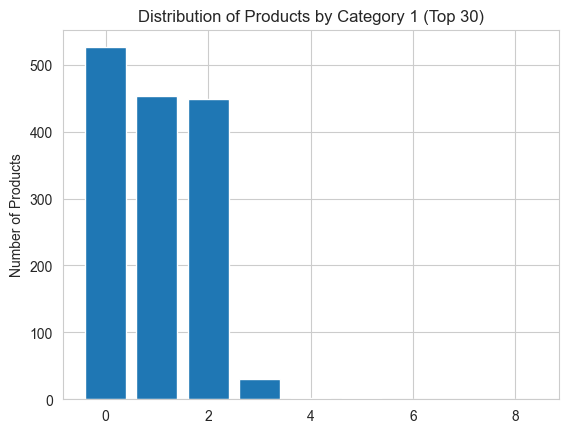

In [646]:
plt.bar(range(len(top_categories1['Category1'])), top_categories1['Number of Products'])
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Category 1 (Top 30)')
plt.show()

In [647]:
by_category2 = amazon_clean['category2'].value_counts()[:30]

In [648]:
top_categories2 = pd.DataFrame({'Category2': by_category2.index, 'Number of Products': by_category2.values})	
top_categories2.head(10)

,Category2,Number of Products
0,Accessories & Peripherals,381
1,Kitchen & Home Appliances,308
2,"Home Theater, TV & Video",162
3,Mobiles & Accessories,161
4,"Heating, Cooling & Air Quality",116
5,Wearable Technology,76
6,"Headphones, Earbuds & Accessories",66
7,Networking Devices,34
8,Office Paper Products,27
9,External Devices & Data Storage,18


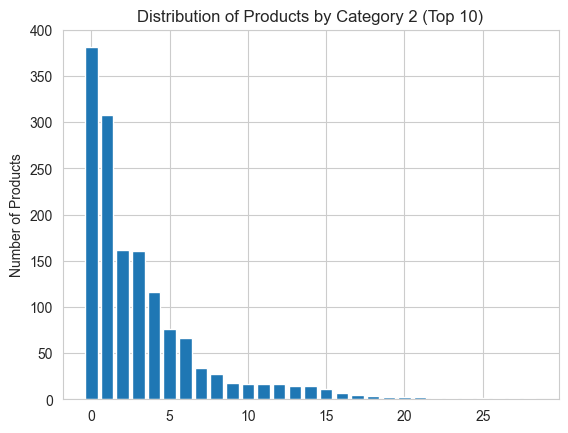

In [649]:
plt.bar(range(len(top_categories2['Category2'])), top_categories2['Number of Products'])
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Category 2 (Top 10)')
plt.show()

In [650]:
discount_by_category = amazon_clean.groupby('category1')['discount_percentage'].mean()

In [651]:
discount_by_category = discount_by_category.sort_values(ascending=False)

In [652]:
discount_by_category

category1
Home Improvement           0.575000
Computers & Accessories    0.540243
Health & PersonalCare      0.530000
Electronics                0.508289
Musical Instruments        0.460000
Car & Motorbike            0.420000
Home & Kitchen             0.401205
Office Products            0.123548
Toys & Games               0.000000
Name: discount_percentage, dtype: float64

In [ ]:
# What's the differences between actual and discounted prices
amazon_clean['difference_price'] = amazon_clean['actual_price'] - amazon_clean['discounted_price']

In [ ]:
dif = sns.barplot(data= amazon_clean.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')
dif.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif.set_xlabel('Price Difference', fontweight='bold')
dif.set_ylabel('Product Name', fontweight='bold')
plt.show()

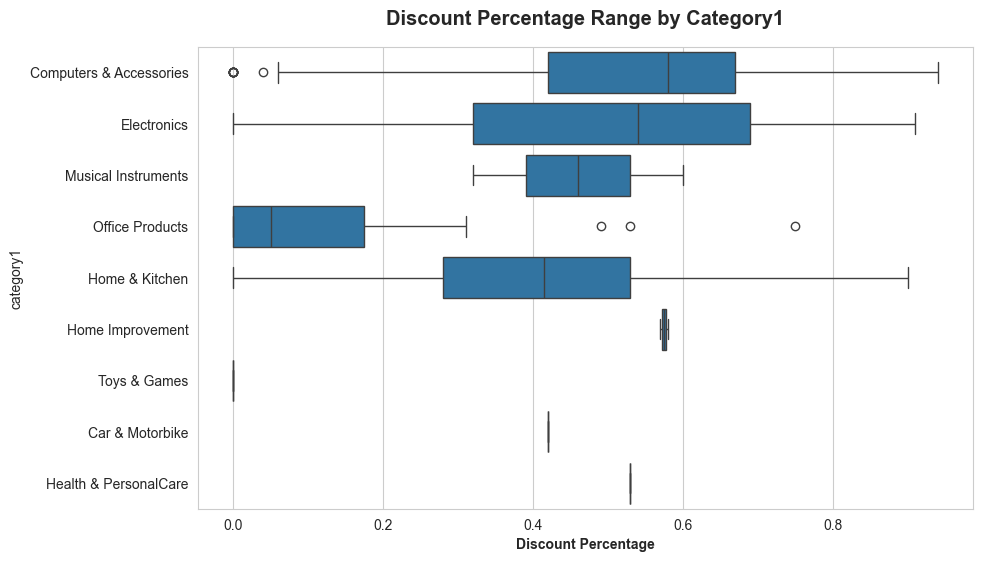

In [653]:
# The Discount Range by Product  Category 1
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=amazon_clean, x='discount_percentage', y='category1')
ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_title('Discount Percentage Range by Category1', fontweight='heavy', size='x-large', y=1.03)
plt.show()

In [659]:
# Top 5 Most Expensive Products After Discount

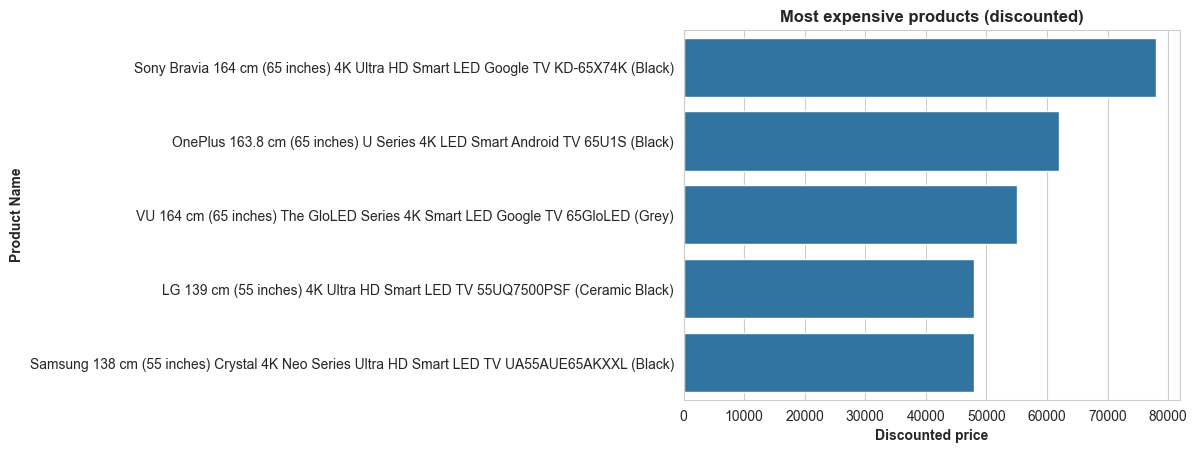

In [660]:
expensive = sns.barplot(data=amazon_clean.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
expensive.set_title('Most expensive products (discounted)', fontweight='bold')
expensive.set_xlabel('Discounted price', fontweight='bold')
expensive.set_ylabel('Product Name', fontweight='bold')
plt.show()

In [661]:
# Top 5 cheapest Products After Discount

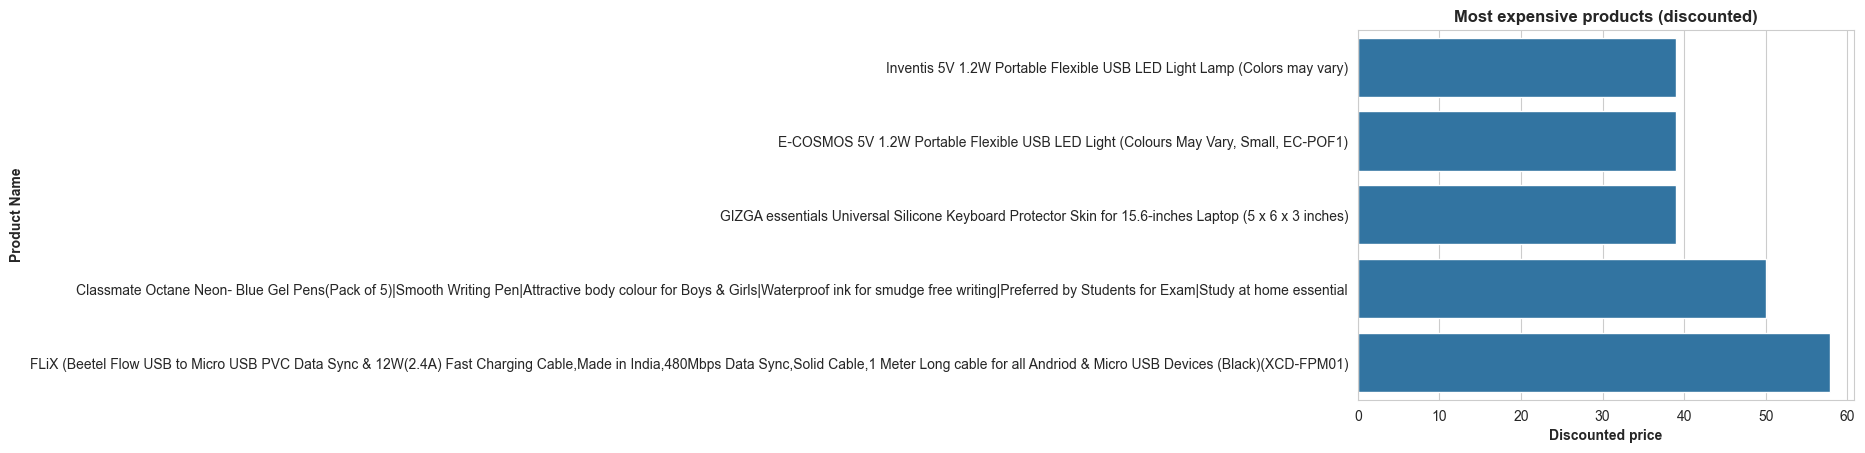

In [662]:
expensive = sns.barplot(data=amazon_clean.sort_values('discounted_price', ascending=True).head(5), x='discounted_price', y='product_name')
expensive.set_title('Most expensive products (discounted)', fontweight='bold')
expensive.set_xlabel('Discounted price', fontweight='bold')
expensive.set_ylabel('Product Name', fontweight='bold')
plt.show()

# Products with the highest discount percentages
top_discounts = amazon_clean.sort_values(by='discount_percentage', ascending=False).head(10)
top_discounts[['product_name', 'discount_percentage', 'discounted_price', 'actual_price']]